## Input Correct File Path

In [9]:
file_path = "Results By Year/20230913- Children Database  - English Main.xlsx"

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import openpyxl
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash import html

pd.set_option('display.max_rows', None)

from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate


In [11]:
c22 = pd.read_csv("Results By Year/All22.csv")
sheet_name = "Children Results "
children = pd.read_excel(file_path, sheet_name=sheet_name)

/Users/jimmckeown/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [12]:
# children = children_all[children_all['Jan - Listen First Sound'].notna() & children_all['June - Listen First Sound'].notna()].copy()

# children = children[children['City'] == 'Gqeberha'].copy()
# children = children[children['Schools'] != 'St Augustines'].copy()

children['Jan - Total'] = children[['Jan - Listen First Sound', 'Jan - Listen Word','Jan - Phonics', 'Jan - Blends', 'Jan - Sight Words',
                                  'Jan - Read Sentences', 'Jan - Read Story', 'Jan - Story Comprehension',
                                  'Jan - Written Letters', 'Jan - Write Name', 'Jan - Write CVCs',
                                  'Jan - Write Sentences']].sum(axis=1,min_count=1)
children['June - Total'] = children[['June - Listen First Sound',
       'June - Listen Word','June - Phonics', 'June - Blends', 'June - Sight Words',
                                  'June - Read Sentences', 'June - Read Story', 'June - Story Comprehension',
                                  'June - Written Letters', 'June - Write Name', 'June - Write CVCs',
                                  'June - Write Sentences']].sum(axis=1,min_count=1)
children['June - Listen First Sound Improvement'] = children['June - Listen First Sound'] - children['Jan - Listen First Sound']
children['June - Listen Word Improvement'] = children['June - Listen Word'] - children['Jan - Listen Word']
children['June - Phonics Improvement'] = children['June - Phonics'] - children['Jan - Phonics']
children['June - Written Letters Improvement'] = children['June - Written Letters'] - children['Jan - Written Letters']
children["Jan - Sounds Total"] =  children["Jan - Listen First Sound"] + children["Jan - Listen Word"]
children["June - Sounds Total"] =  children["June - Listen First Sound"] + children["June - Listen Word"]
children["June - Sounds Total Improvement"] = children["June - Sounds Total"] - children["Jan - Sounds Total"]
children["June - Blends Improvement"] = children["June - Blends"] - children["Jan - Blends"]
children["June - Read Sentences Improvement"] = children["June - Read Sentences"] - children["Jan - Read Sentences"]
children["June - Read Story Improvement"] = children["June - Read Story"] - children["Jan - Read Story"]
children["June - Sight Words Improvement"] = children["June - Sight Words"] - children["Jan - Sight Words"]
children["June - Write Sentence Improvement"] = children["June - Write Sentences"] - children["Jan - Write Sentences"]
children["June - Write CVCs Improvement"] = children["June - Write CVCs"] - children["Jan - Write CVCs"]
children["June - Total Improvement"] = children["June - Total"] - children["Jan - Total"]
# Sounds and Phonics Total is 49
children["Jan - Sounds and Phonics"] = children["Jan - Listen First Sound"] + children["Jan - Listen Word"] + children['Jan - Phonics']
# Reading total is 128
children["Jan - Reading"] = children["Jan - Blends"] + children["Jan - Sight Words"] + children['Jan - Read Sentences'] + children["Jan - Read Story"] + children["Jan - Story Comprehension"]
# Writing total is 87
children["Jan - Writing"] = children['Jan - Written Letters'] + children["Jan - Write CVCs"] + children["Jan - Write Sentences"]
# Sounds and Phonics Total is 49
children["June - Sounds and Phonics"] = children["June - Listen First Sound"] + children["June - Listen Word"] + children['June - Phonics']
# Reading total is 128
children["June - Reading"] = children["June - Blends"] + children["June - Sight Words"] + children['June - Read Sentences'] + children["June - Read Story"] + children["June - Story Comprehension"]
# Writing total is 87
children["June - Writing"] = children['June - Written Letters'] + children["June - Write CVCs"] + children["June - Write Sentences"]

children["June - Sounds and Phonics Improvement"] = children["June - Sounds and Phonics"] - children["Jan - Sounds and Phonics"]
children["June - Reading Improvement"] = children["June - Reading"] - children["Jan - Reading"]
children["June - Writing Improvement"] = children["June - Writing"] - children["Jan - Writing"] 

improvement_columns = ["June - Listen First Sound Improvement","June - Listen Word Improvement", "June - Phonics Improvement","June - Blends Improvement", "June - Sight Words Improvement", "June - Read Sentences Improvement", "June - Read Story Improvement", "June - Written Letters Improvement", "June - Write CVCs Improvement", "June - Write Sentence Improvement", "June - Total Improvement" ]

primary = children[children['Grade'] != 'PreR']
primary_on = primary[primary['On The Programme'] == 'Yes']

ecd = children[children['Grade'] == 'PreR']
ecd_on = ecd[ecd['On The Programme'] == 'Yes']

# Functions

In [13]:
def total_sessions_per_lc():
    primary = children[children['Grade'] != 'PreR']
    primary_on = primary[primary['On The Programme'] == 'Yes']
    return primary_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

def total_sessions_per_ecd():
    ecd = children[children['Grade'] == 'PreR']
    ecd_on = ecd[ecd['On The Programme'] == 'Yes']
    return ecd_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

def avg_sessions_per_grade_primary_top10():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False).head(10)

def avg_sessions_per_grade_primary_bottom10():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=True).head(10)

def avg_sessions_per_lc_top20():
    return primary_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)

def avg_sessions_per_lc_bottom20():
    return primary_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

def avg_sessions_per_ecd():
    return ecd_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False)

def avg_sessions_per_school():
    return primary_on.groupby(['School', 'Grade'])['Total Sessions'].mean().sort_values(ascending=False)

def avg_sessions_per_lc_ecd_top20():
    return ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=False).head(20)
    
def avg_sessions_per_lc_ecd_botton20():
    return ecd_on.groupby(['LC Name', 'School'])['Total Sessions'].mean().sort_values(ascending=True).head(20)

def children_on_programme_chart():
    kids_on_programme = ecd_on.groupby('School')['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

    # Plot the sorted data using Plotly
    fig = px.bar(kids_on_programme,
                 y='Num of Children',
                 x='School',
                 title='Number of Children on Programme',
                 template='plotly')

    return fig.show()

def children_on_programme_stacked_chart():
    kids_on_programme = primary_on.groupby(['School', 'Grade'])['Mcode'].count().reset_index(name="Num of Children").sort_values("Num of Children", ascending=False)

    # Plot the sorted data using Plotly
    fig = px.bar(kids_on_programme,
                 y='Num of Children',
                 x='School',
                 color='Grade',
                 title='Number of Children on Programme',
                 template='plotly')

    return fig.show()

def sessions_per_child_primary():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] != "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='Primary School: Average Sessions per Child',
                 template='plotly')

    return fig.show()

def sessions_per_child_ecd():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].mean().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='ECDCs: Average Sessions per Child',
                 template='plotly')

    return fig.show()

def total_sessions_ecd():
    filtered_children = children[(children['On The Programme'] == 'Yes') & (children['Grade'] == "PreR")]
    grouped = filtered_children.groupby('School')['Total Sessions'].sum().sort_values(ascending=False).reset_index()

    # Plot the sorted data using Plotly
    fig = px.bar(grouped,
                 y='Total Sessions',
                 x='School',
                 title='ECDCs: Total Sessions in 2023',
                 template='plotly')

    return fig.show()

def total_sessions_by_ecd_lc():
    ecd = children[children['Grade'] == 'PreR']
    ecd_on = ecd[ecd['On The Programme'] == 'Yes']
    return ecd_on.groupby(['School', 'LC Name'])['Total Sessions'].sum().sort_values(ascending=False)

def jan_assessments_per_school():
    primary = children[children['Grade'] != 'PreR']
    primary_on = primary[primary['On The Programme'] == 'Yes']

    gbo_primary = children[children['Grade'] != 'PreR'].groupby('School')
    gbo_primary_on = primary[primary['On The Programme'] == 'Yes'].groupby('School')

    total_children = gbo_primary['Full Name'].count()
    total_children_assessed = gbo_primary['Jan - Phonics'].count()

    percent_assessed = (total_children_assessed / total_children) * 100


    df_assessed = pd.DataFrame({'Number of Children': total_children, 
                              'Number of Children Assessed': total_children_assessed, 
                              'Percentage Assessed': percent_assessed})
    return df_assessed.sort_values('Percentage Assessed', ascending=False)

def jan_assessments_per_ecd():
    gbo_ecd = children[children['Grade'] == 'PreR'].groupby('School')
    gbo_ecd_on = ecd[ecd['On The Programme'] == 'Yes'].groupby('School')

    total_children = gbo_ecd_on['Full Name'].count()
    total_children_assessed = gbo_ecd_on['Jan - Phonics'].count()

    percent_assessed = (total_children_assessed / total_children) * 100


    df_assessed = pd.DataFrame({'Number of Children': total_children, 
                              'Number of Children Assessed': total_children_assessed, 
                              'Percentage Assessed': percent_assessed})
    return df_assessed.sort_values('Percentage Assessed', ascending=False)

def low_assessments_grades():
    gbo_grade = primary.groupby(['School', 'Grade'])
    total_children_grade = gbo_grade['Full Name'].count()
    total_children_grade_assessed = gbo_grade['Jan - Total'].count()

    percent_assessed_grade = (total_children_grade_assessed / total_children_grade) * 100


    df_assessed_grade = pd.DataFrame({'Number of Children': total_children_grade, 
                              'Number of Children Assessed': total_children_grade_assessed, 
                              'Percentage Assessed': percent_assessed_grade})

    # df_assessed_grade
    return df_assessed_grade[df_assessed_grade['Percentage Assessed'] < 85]

def june_assessments_per_school():
    #Note in January we are only assessing children on the programme

    primary = children[children['Grade'] != 'PreR']
    primary_on = primary[primary['On The Programme'] == 'Yes']

    gbo_primary = children[children['Grade'] != 'PreR'].groupby('School')
    gbo_primary_on = primary[primary['On The Programme'] == 'Yes'].groupby('School')

    total_children = gbo_primary_on['Full Name'].count()
    total_children_assessed = gbo_primary_on['June - Phonics'].count()

    percent_assessed = (total_children_assessed / total_children) * 100


    df_assessed = pd.DataFrame({'Number of Children': total_children, 
                              'Number of Children Assessed': total_children_assessed, 
                              'Percentage Assessed': percent_assessed})
    return df_assessed.sort_values('Percentage Assessed', ascending=False)

def june_assessments_per_ecd():
    gbo_ecd = children[children['Grade'] == 'PreR'].groupby('School')
    gbo_ecd_on = ecd[ecd['On The Programme'] == 'Yes'].groupby('School')

    total_children = gbo_ecd_on['Full Name'].count()
    total_children_assessed = gbo_ecd_on['June - Phonics'].count()

    percent_assessed = (total_children_assessed / total_children) * 100


    df_assessed = pd.DataFrame({'Number of Children': total_children, 
                              'Number of Children Assessed': total_children_assessed, 
                              'Percentage Assessed': percent_assessed})
    return df_assessed.sort_values('Percentage Assessed', ascending=False)

def low_assessment_grades():
    gbo_grade = primary_on.groupby(['School', 'Grade'])
    total_children_grade = gbo_grade['Full Name'].count()
    total_children_grade_assessed = gbo_grade['June - Total'].count()

    percent_assessed_grade = (total_children_grade_assessed / total_children_grade) * 100


    df_assessed_grade = pd.DataFrame({'Number of Children': total_children_grade, 
                              'Number of Children Assessed': total_children_grade_assessed, 
                              'Percentage Assessed': percent_assessed_grade})

    # df_assessed_grade
    return df_assessed_grade[df_assessed_grade['Percentage Assessed'] < 85]

def lc_kids_check():
    program_yes = children[(children['On The Programme'] == 'Yes') & (children['LC Name'] != 'Graduated') ]
    lc_program_counts = program_yes.groupby(['LC Name', 'School']).size().reset_index(name="Num of Children").sort_values("Num of Children")
    return lc_program_counts[~lc_program_counts['Num of Children'].between(8,12)]

# List of Functions

- total_sessions_per_lc()

- total_sessions_per_ecd()

- avg_sessions_per_grade_primary_top10()

- avg_sessions_per_grade_primary_bottom10()

- avg_sessions_per_lc_top20()

- avg_sessions_per_lc_bottom20()

- avg_sessions_per_ecd()

- avg_sessions_per_school()

- avg_sessions_per_lc_ecd_top20()
    
- avg_sessions_per_lc_ecd_botton20()

- children_on_programme_chart()

- children_on_programme_stacked_chart()

- sessions_per_child_primary()

- sessions_per_child_ecd()

- total_sessions_ecd()

- total_sessions_by_ecd_lc()

- jan_assessments_per_school()

- jan_assessments_per_ecd()

- low_assessments_grades()

- june_assessments_per_school()

- june_assessments_per_ecd()

- low_assessment_grades()

- lc_kids_check()


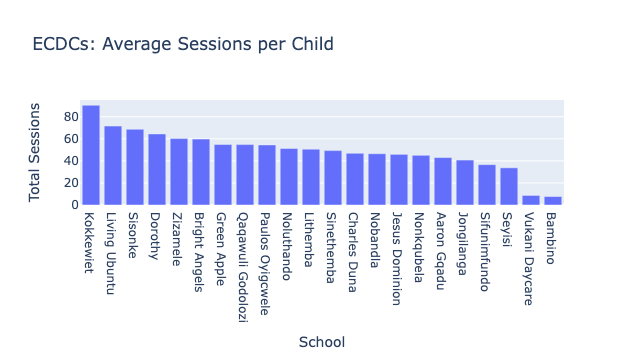

In [21]:
sessions_per_child_ecd()